In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time

In [3]:
from dictionary.word_frequency import WordFrequency
from dictionary.base_dictionary import BaseDictionary
from dictionary.array_dictionary import ArrayDictionary
from dictionary.linkedlist_dictionary import LinkedListDictionary
from dictionary.trie_dictionary import TrieDictionary

In [4]:
# Step 2: Load the dataset and create a list of WordFrequency objects
file_path = 'sampleData200k.txt'
word_frequency_objects = []

with open(file_path, 'r') as file:
    for line in file:
        word, frequency = line.strip().split()
        frequency = int(frequency)
        word_frequency_objects.append(WordFrequency(word, frequency))

# Array

## Add

In [5]:
# Step 1: Split the original dataset into two parts
split_index = 1000
words_to_add = word_frequency_objects[:split_index]  # First 1000 words for adding later
initial_dataset = word_frequency_objects[split_index:]  # Remaining words to build initial dictionaries

# Step 2: Prepare datasets of varying sizes (e.g., 1000, 5000, 10000, ... , 200000)
dataset_sizes = [1000, 5000, 10000, 20000, 40000, 80000, 160000, len(initial_dataset)]
datasets = {size: initial_dataset[:size] for size in dataset_sizes}

In [15]:
def measure_add_time(dataset, words_to_add):
    # Instantiate and build the dictionary
    array_dict = ArrayDictionary()
    array_dict.build_dictionary(dataset)
    
    # List to store the time taken for each add operation
    add_times = []
    
    # Measure the time taken to add each word
    for word_freq in words_to_add:
        start_time = time.perf_counter()
        array_dict.add_word_frequency(word_freq)
        end_time = time.perf_counter()
        
        # Record the time taken
        add_times.append(end_time - start_time)
    
    # Return the average time taken
    return np.mean(add_times)

# Measure the average time taken for each dataset size using time.perf_counter
add_time_data_perf_counter = {}
for size in dataset_sizes:
    add_time_data_perf_counter[size] = measure_add_time(datasets[size], words_to_add)

add_time_data_perf_counter

{1000: 2.2086000013814556e-06,
 5000: 3.274200001101235e-06,
 10000: 3.311599998824022e-06,
 20000: 3.0605999983208677e-06,
 40000: 3.8935000000037685e-06,
 80000: 4.263800004309814e-06,
 160000: 5.969799997501468e-06,
 199000: 5.316200000720528e-06}

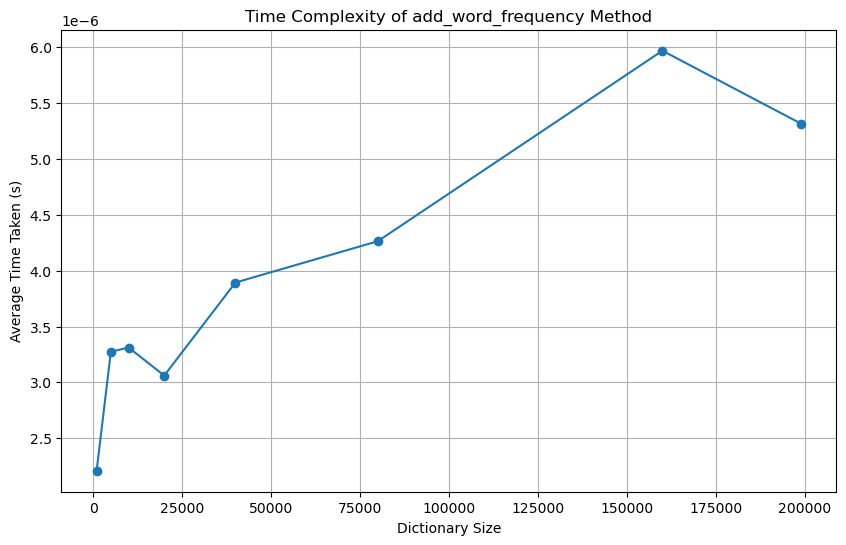

In [30]:
# Step 4: Plot the data
sizes = list(add_time_data_perf_counter.keys())
times = list(add_time_data_perf_counter.values())

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(sizes, times, marker='o')
plt.title('Time Complexity of add_word_frequency Method')
plt.xlabel('Dictionary Size')
plt.ylabel('Average Time Taken (s)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.show()


## Delete

In [17]:
# Function to measure the time taken to delete words from a dictionary
def measure_delete_time(dataset, words_to_delete):
    # Instantiate and build the dictionary
    array_dict = ArrayDictionary()
    array_dict.build_dictionary(dataset)
    
    # List to store the time taken for each delete operation
    delete_times = []
    
    # Measure the time taken to delete each word
    for word in words_to_delete:
        start_time = time.perf_counter()
        array_dict.delete_word(word.word)  # We use word.word to get the word string from the WordFrequency object
        end_time = time.perf_counter()
        
        # Record the time taken
        delete_times.append(end_time - start_time)
    
    # Return the average time taken
    return np.mean(delete_times)

In [18]:
# Function to select words from various positions in the dictionary for deletion
def select_words_for_deletion(dataset):
    # Select words from the beginning, middle, and end of the dictionary
    n = len(dataset)
    indices_to_select = [0, n//4, n//2, 3*n//4, n-1]
    return [dataset[i] for i in indices_to_select]

# Step 1: Select words from various positions in each dataset for deletion
words_to_delete_per_dataset = {size: select_words_for_deletion(datasets[size]) for size in dataset_sizes}

# Step 2: Measure the average time taken to delete a word for each dataset size
delete_time_data = {}
for size in dataset_sizes:
    delete_time_data[size] = measure_delete_time(datasets[size], words_to_delete_per_dataset[size])

delete_time_data


{1000: 4.239999998389976e-06,
 5000: 3.960000049119116e-06,
 10000: 4.939999962516595e-06,
 20000: 1.5440000061062166e-05,
 40000: 2.491999994163052e-05,
 80000: 4.157999997005391e-05,
 160000: 6.759999996575061e-05,
 199000: 7.935999997243925e-05}

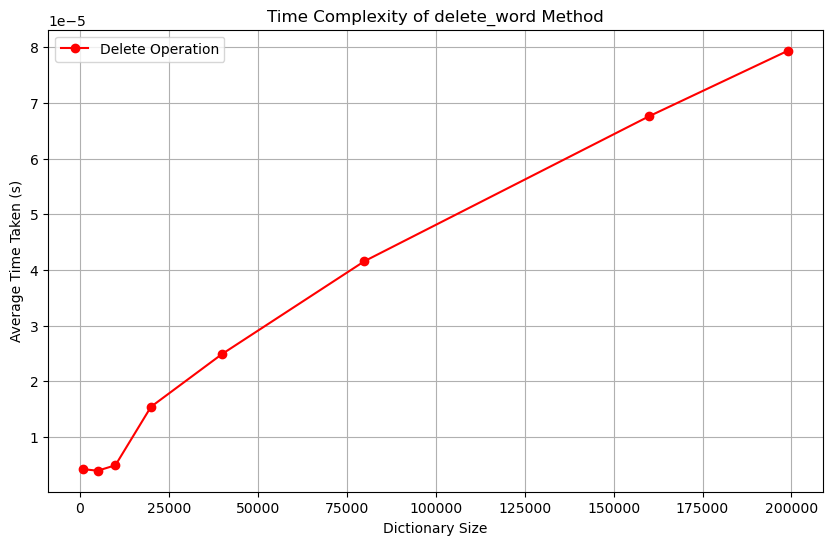

In [31]:
# New times obtained for delete operation
delete_times = list(delete_time_data.values())

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(sizes, delete_times, marker='o', label='Delete Operation', color='red')
plt.title('Time Complexity of delete_word Method')
plt.xlabel('Dictionary Size')
plt.ylabel('Average Time Taken (s)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


In [26]:
# Function to measure the time taken to search words in a dictionary
def measure_search_time(dataset, words_to_search):
    # Instantiate and build the dictionary
    array_dict = ArrayDictionary()
    array_dict.build_dictionary(dataset)
    
    # List to store the time taken for each search operation
    search_times = []
    
    # Measure the time taken to search each word
    for word in words_to_search:
        start_time = time.perf_counter()
        array_dict.search(word.word)  # We use word.word to get the word string from the WordFrequency object
        end_time = time.perf_counter()
        
        # Record the time taken
        search_times.append(end_time - start_time)
    
    # Return the average time taken
    return np.mean(search_times)

# Step 1: Select words from various positions in each dataset for search
words_to_search_per_dataset = {size: select_words_for_deletion(datasets[size]) for size in dataset_sizes}

# Step 2: Measure the average time taken to search a word for each dataset size
search_time_data = {}
for size in dataset_sizes:
    search_time_data[size] = measure_search_time(datasets[size], words_to_search_per_dataset[size])

search_time_data


{1000: 6.199999961609137e-06,
 5000: 4.340000032243552e-06,
 10000: 6.159999975352548e-06,
 20000: 9.780000027603819e-06,
 40000: 1.1599999970712815e-05,
 80000: 1.3659999967785553e-05,
 160000: 1.3080000007903436e-05,
 199000: 1.5200000007098424e-05}

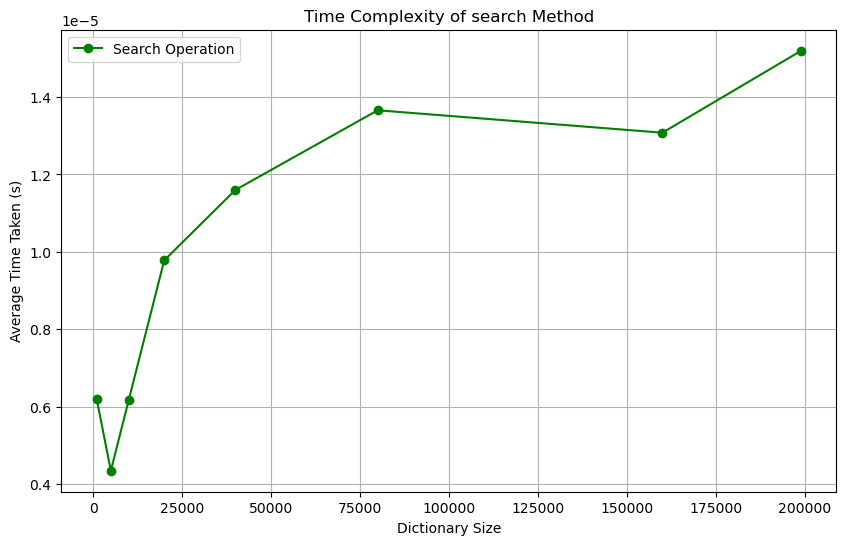

In [33]:
# New times obtained for search operation
search_times = list(search_time_data.values())

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(sizes, search_times, marker='o', label='Search Operation', color='green')
plt.title('Time Complexity of search Method')
plt.xlabel('Dictionary Size')
plt.ylabel('Average Time Taken (s)')
plt.grid(True)
plt.legend()
plt.show()


## Auto complete

In [28]:
# Function to select prefix strings from various positions in the dictionary for autocomplete operation
def select_prefixes_for_autocomplete(dataset):
    # Select prefix strings from the beginning, middle, and end of the dictionary
    n = len(dataset)
    indices_to_select = [0, n//4, n//2, 3*n//4, n-1]
    return [dataset[i].word[:3] for i in indices_to_select]  # Taking first 3 letters as prefix

# Function to measure the time taken for autocomplete operation
def measure_autocomplete_time(dataset, prefixes_to_autocomplete):
    # Instantiate and build the dictionary
    array_dict = ArrayDictionary()
    array_dict.build_dictionary(dataset)
    
    # List to store the time taken for each autocomplete operation
    autocomplete_times = []
    
    # Measure the time taken for each autocomplete operation
    for prefix in prefixes_to_autocomplete:
        start_time = time.perf_counter()
        array_dict.autocomplete(prefix)
        end_time = time.perf_counter()
        
        # Record the time taken
        autocomplete_times.append(end_time - start_time)
    
    # Return the average time taken
    return np.mean(autocomplete_times)

# Step 1: Select prefix strings from various positions in each dataset for autocomplete operation
prefixes_to_autocomplete_per_dataset = {size: select_prefixes_for_autocomplete(datasets[size]) for size in dataset_sizes}

# Step 2: Measure the average time taken for autocomplete operation for each dataset size
autocomplete_time_data = {}
for size in dataset_sizes:
    autocomplete_time_data[size] = measure_autocomplete_time(datasets[size], prefixes_to_autocomplete_per_dataset[size])

autocomplete_time_data


{1000: 1.3940000008005881e-05,
 5000: 1.5319999965868193e-05,
 10000: 4.035999995721795e-05,
 20000: 2.0460000041566672e-05,
 40000: 3.748000003724883e-05,
 80000: 9.108000003834604e-05,
 160000: 0.00020396000004438975,
 199000: 0.0002480999999534106}

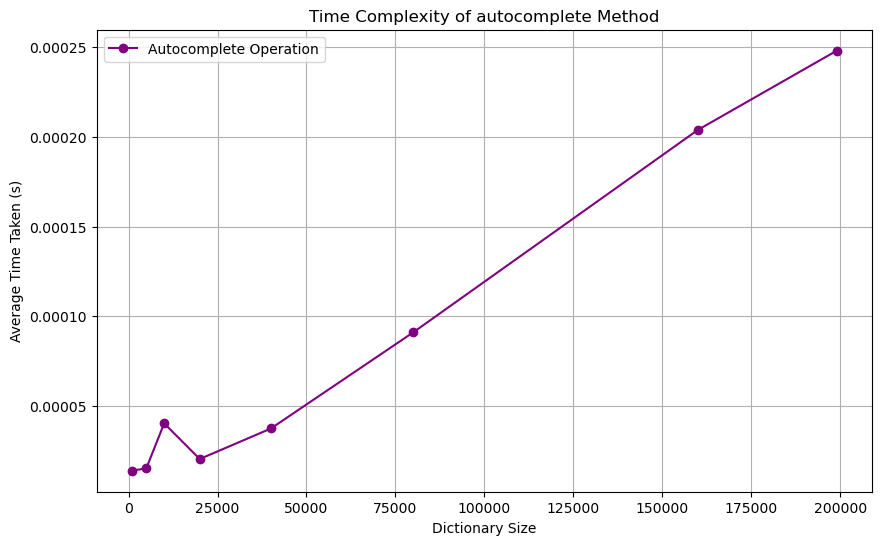

In [34]:
# New times obtained for autocomplete operation
autocomplete_times = list(autocomplete_time_data.values())

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(sizes, autocomplete_times, marker='o', label='Autocomplete Operation', color='purple')
plt.title('Time Complexity of autocomplete Method')
plt.xlabel('Dictionary Size')
plt.ylabel('Average Time Taken (s)')
plt.grid(True)
plt.legend()
plt.show()


# Linked list

## Add

In [36]:
# Using smaller dataset for linkedlist
dataset_sizes = [10, 50, 100, 200, 400, 800, 1600, 3200]
datasets = {size: initial_dataset[:size] for size in dataset_sizes}

In [37]:
# Modifying the function to use time.perf_counter for higher resolution timing
def measure_add_time(dataset, words_to_add):
    # Instantiate and build the dictionary
    array_dict = LinkedListDictionary()
    array_dict.build_dictionary(dataset)
    
    # List to store the time taken for each add operation
    add_times = []
    
    # Measure the time taken to add each word
    for word_freq in words_to_add:
        start_time = time.perf_counter()
        array_dict.add_word_frequency(word_freq)
        end_time = time.perf_counter()
        
        # Record the time taken
        add_times.append(end_time - start_time)
    
    # Return the average time taken
    return np.mean(add_times)

# Measure the average time taken for each dataset size using time.perf_counter
add_time_data_perf_counter = {}
for size in dataset_sizes:
    add_time_data_perf_counter[size] = measure_add_time(datasets[size], words_to_add)

add_time_data_perf_counter

{10: 6.331359998875996e-05,
 50: 6.809020000264354e-05,
 100: 7.175770000458214e-05,
 200: 8.378059999904508e-05,
 400: 0.00010992539998915163,
 800: 0.00015634229999204763,
 1600: 0.00028164270001025215,
 3200: 0.0004936587999936819}

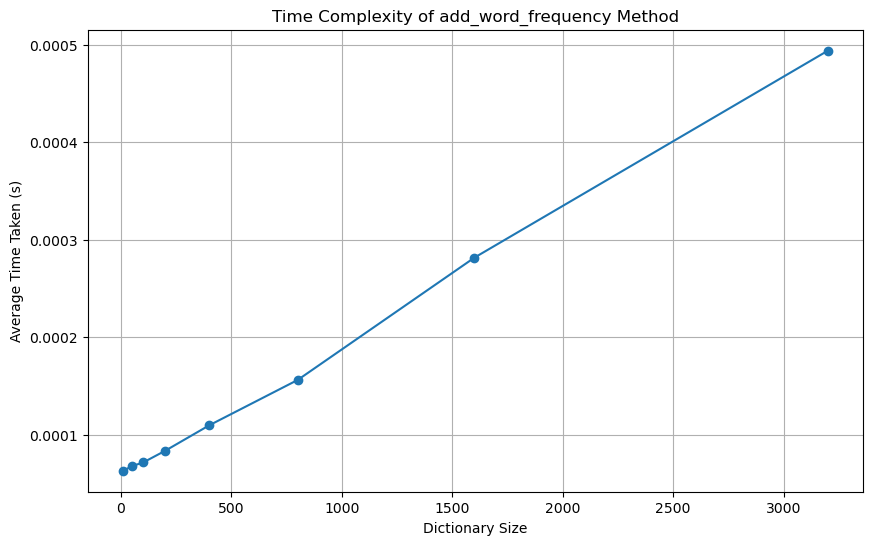

In [38]:
# Step 4: Plot the data
sizes = list(add_time_data_perf_counter.keys())
times = list(add_time_data_perf_counter.values())

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(sizes, times, marker='o')
plt.title('Time Complexity of add_word_frequency Method')
plt.xlabel('Dictionary Size')
plt.ylabel('Average Time Taken (s)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.show()


In [39]:
# Function to measure the time taken to delete words from a dictionary
def measure_delete_time(dataset, words_to_delete):
    # Instantiate and build the dictionary
    array_dict = LinkedListDictionary()
    array_dict.build_dictionary(dataset)
    
    # List to store the time taken for each delete operation
    delete_times = []
    
    # Measure the time taken to delete each word
    for word in words_to_delete:
        start_time = time.perf_counter()
        array_dict.delete_word(word.word)  # We use word.word to get the word string from the WordFrequency object
        end_time = time.perf_counter()
        
        # Record the time taken
        delete_times.append(end_time - start_time)
    
    # Return the average time taken
    return np.mean(delete_times)

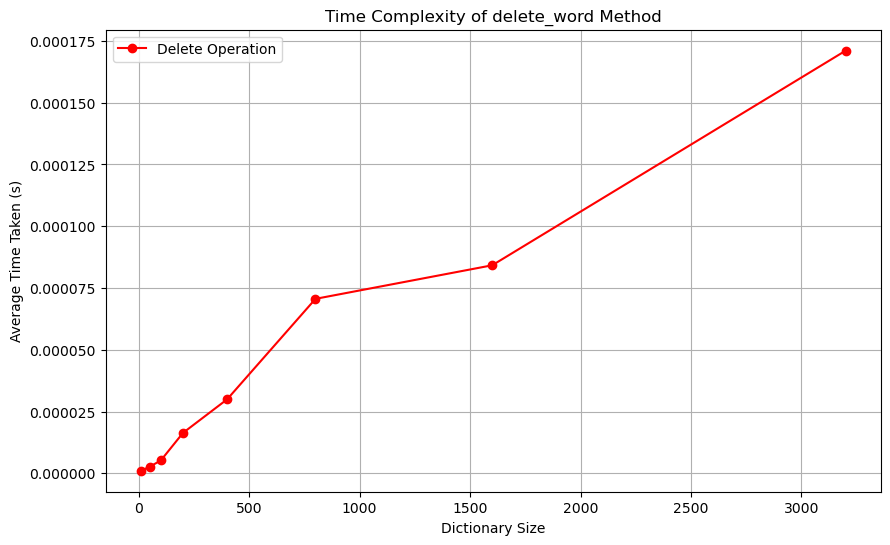

In [41]:
# Function to select words from various positions in the dictionary for deletion
def select_words_for_deletion(dataset):
    # Select words from the beginning, middle, and end of the dictionary
    n = len(dataset)
    indices_to_select = [0, n//4, n//2, 3*n//4, n-1]
    return [dataset[i] for i in indices_to_select]

# Step 1: Select words from various positions in each dataset for deletion
words_to_delete_per_dataset = {size: select_words_for_deletion(datasets[size]) for size in dataset_sizes}

# Step 2: Measure the average time taken to delete a word for each dataset size
delete_time_data = {}
for size in dataset_sizes:
    delete_time_data[size] = measure_delete_time(datasets[size], words_to_delete_per_dataset[size])

delete_time_data

# New times obtained for delete operation
delete_times = list(delete_time_data.values())

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(sizes, delete_times, marker='o', label='Delete Operation', color='red')
plt.title('Time Complexity of delete_word Method')
plt.xlabel('Dictionary Size')
plt.ylabel('Average Time Taken (s)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


In [47]:
# Function to measure the time taken to search words in a dictionary
def measure_search_time(dataset, words_to_search):
    # Instantiate and build the dictionary
    array_dict = LinkedListDictionary()
    array_dict.build_dictionary(dataset)
    
    # List to store the time taken for each search operation
    search_times = []
    
    # Measure the time taken to search each word
    for word in words_to_search:
        start_time = time.perf_counter()
        array_dict.search(word.word)  # We use word.word to get the word string from the WordFrequency object
        end_time = time.perf_counter()
        
        # Record the time taken
        search_times.append(end_time - start_time)
    
    # Return the average time taken
    return np.mean(search_times)

# Step 1: Select words from various positions in each dataset for search
words_to_search_per_dataset = {size: select_words_for_deletion(datasets[size]) for size in dataset_sizes}

# Step 2: Measure the average time taken to search a word for each dataset size
search_time_data = {}
for size in dataset_sizes:
    search_time_data[size] = measure_search_time(datasets[size], words_to_search_per_dataset[size])

search_time_data


{10: 1.160000010713702e-06,
 50: 2.339999809919391e-06,
 100: 4.3999999434163325e-06,
 200: 8.14000004538684e-06,
 400: 1.6279999999824214e-05,
 800: 3.2539999938308026e-05,
 1600: 7.051999982650159e-05,
 3200: 0.00014772000004086293}

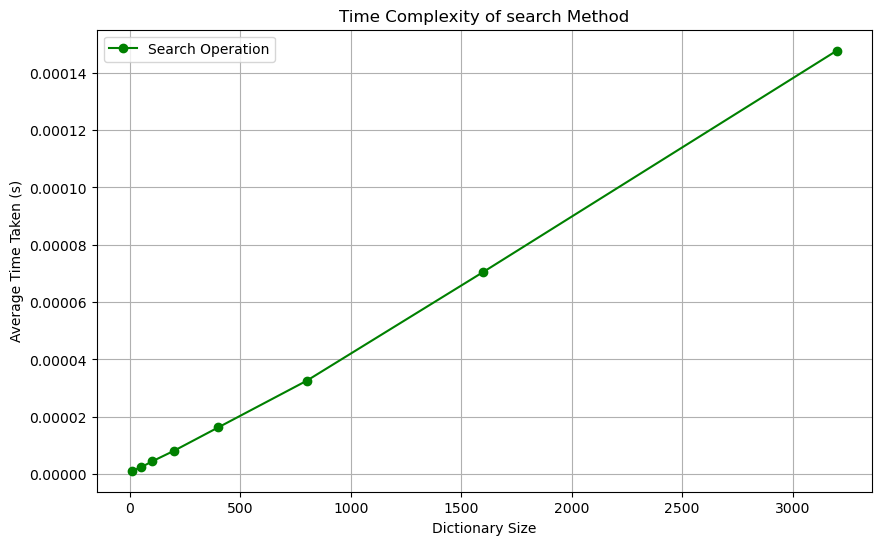

In [48]:
# New times obtained for search operation
search_times = list(search_time_data.values())

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(sizes, search_times, marker='o', label='Search Operation', color='green')
plt.title('Time Complexity of search Method')
plt.xlabel('Dictionary Size')
plt.ylabel('Average Time Taken (s)')
# plt.xscale('log')
# plt.yscale('log')
plt.grid(True)
plt.legend()
plt.show()


In [49]:
# Function to select prefix strings from various positions in the dictionary for autocomplete operation
def select_prefixes_for_autocomplete(dataset):
    # Select prefix strings from the beginning, middle, and end of the dictionary
    n = len(dataset)
    indices_to_select = [0, n//4, n//2, 3*n//4, n-1]
    return [dataset[i].word[:3] for i in indices_to_select]  # Taking first 3 letters as prefix

# Function to measure the time taken for autocomplete operation
def measure_autocomplete_time(dataset, prefixes_to_autocomplete):
    # Instantiate and build the dictionary
    array_dict = LinkedListDictionary()
    array_dict.build_dictionary(dataset)
    
    # List to store the time taken for each autocomplete operation
    autocomplete_times = []
    
    # Measure the time taken for each autocomplete operation
    for prefix in prefixes_to_autocomplete:
        start_time = time.perf_counter()
        array_dict.autocomplete(prefix)
        end_time = time.perf_counter()
        
        # Record the time taken
        autocomplete_times.append(end_time - start_time)
    
    # Return the average time taken
    return np.mean(autocomplete_times)

# Step 1: Select prefix strings from various positions in each dataset for autocomplete operation
prefixes_to_autocomplete_per_dataset = {size: select_prefixes_for_autocomplete(datasets[size]) for size in dataset_sizes}

# Step 2: Measure the average time taken for autocomplete operation for each dataset size
autocomplete_time_data = {}
for size in dataset_sizes:
    autocomplete_time_data[size] = measure_autocomplete_time(datasets[size], prefixes_to_autocomplete_per_dataset[size])

autocomplete_time_data


{10: 3.6599998566089197e-06,
 50: 1.1779999931604835e-05,
 100: 1.7980000029638178e-05,
 200: 3.645999995569582e-05,
 400: 6.840000005468028e-05,
 800: 0.00013252000017018872,
 1600: 0.0002667999999175663,
 3200: 0.0006839399999989837}

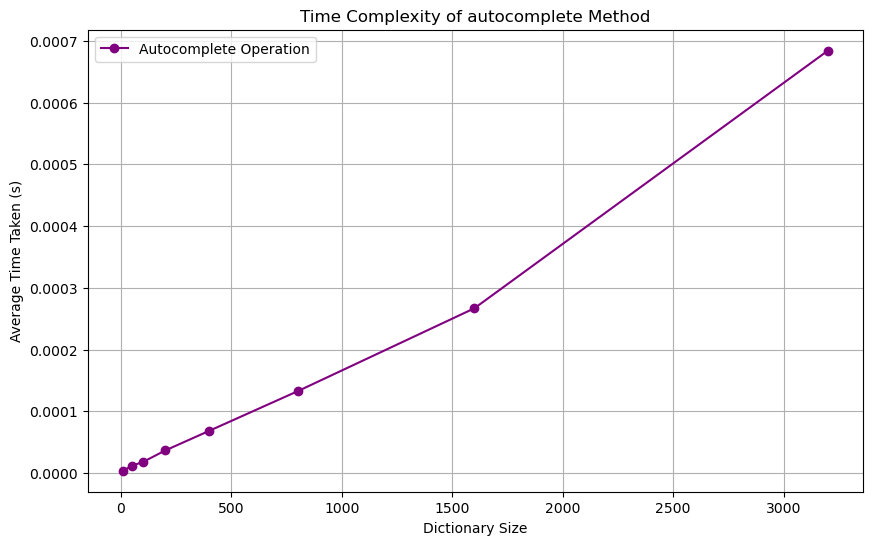

In [50]:
# New times obtained for autocomplete operation
autocomplete_times = list(autocomplete_time_data.values())

# Plotting the data
plt.figure(figsize=(10,6))
plt.plot(sizes, autocomplete_times, marker='o', label='Autocomplete Operation', color='purple')
plt.title('Time Complexity of autocomplete Method')
plt.xlabel('Dictionary Size')
plt.ylabel('Average Time Taken (s)')
plt.grid(True)
plt.legend()
plt.show()


# Trie

In [64]:
from collections import defaultdict

def group_words_by_length(file_path, length_bins):
    # Create a dictionary to store the words grouped by their lengths
    words_by_length = defaultdict(list)
    
    with open(file_path, 'r') as file:
        for line in file:
            word, frequency = line.strip().split()
            frequency = int(frequency)
            
            # Determine the length bin for the word
            word_length = len(word)
            for length_bin in length_bins:
                if length_bin[0] <= word_length <= length_bin[1]:
                    words_by_length[length_bin].append(WordFrequency(word, frequency))
                    break
    
    return words_by_length


In [58]:
def measure_add_time(trie_dict, word_group):
    start_time = perf_counter()

    # Add each word in the word group to the dictionary
    for word_frequency in word_group:
        trie_dict.add_word_frequency(word_frequency)

    end_time = perf_counter()

    # Calculate and return the average time taken to add a word
    avg_time = (end_time - start_time) / len(word_group)
    return avg_time

def measure_search_time(trie_dict, word_group):
    start_time = perf_counter()
    for word_frequency in word_group:
        trie_dict.search(word_frequency.word)
    end_time = perf_counter()
    avg_time = (end_time - start_time) / len(word_group)
    return avg_time

def measure_delete_time(trie_dict, word_group):
    start_time = perf_counter()
    for word_frequency in word_group:
        trie_dict.delete_word(word_frequency.word)
    end_time = perf_counter()
    avg_time = (end_time - start_time) / len(word_group)
    return avg_time

def measure_autocomplete_time(trie_dict, word_group):
    start_time = perf_counter()
    for word_frequency in word_group:
        trie_dict.autocomplete(word_frequency.word[:3])  # Using the first 3 letters as the prefix for autocomplete
    end_time = perf_counter()
    avg_time = (end_time - start_time) / len(word_group)
    return avg_time

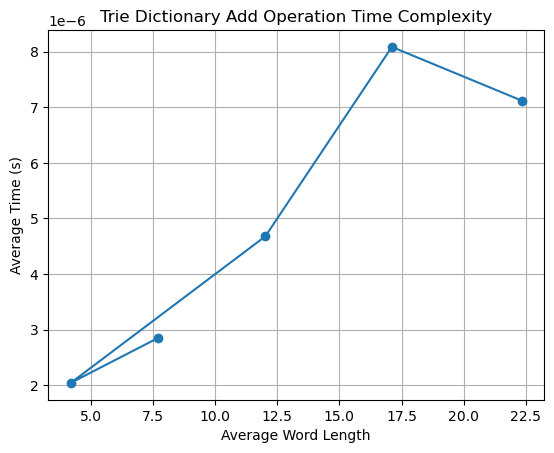

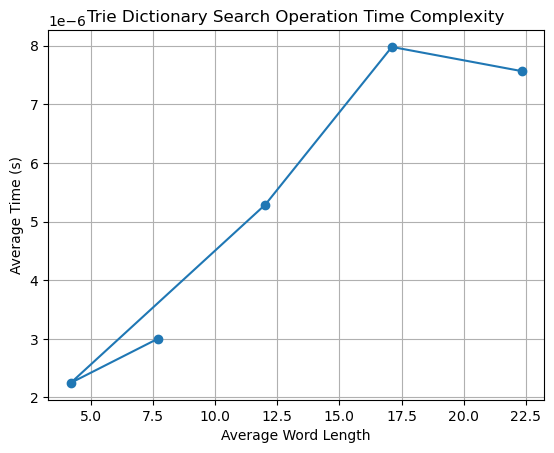

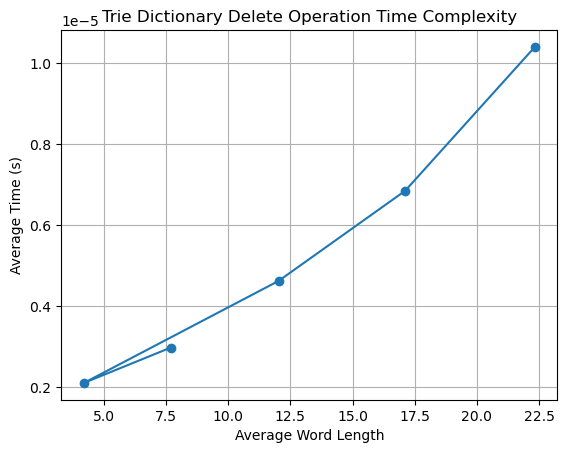

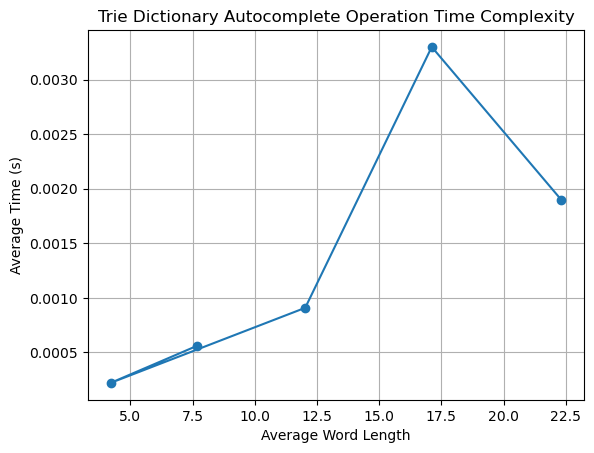

In [63]:
def plot_trie_operation_times(words_by_length, operation_name, measure_time_function):
    avg_times = []
    avg_word_lengths = []

    # Create a TrieDictionary instance and build it with all words in the dataset
    trie_dict = TrieDictionary()
    all_words = [word for word_group in words_by_length.values() for word in word_group]
    trie_dict.build_dictionary(all_words)

    # Measure the time for each length bin
    for length_bin, word_group in words_by_length.items():
        # Limiting the number of words in each group to 1000
        word_group = word_group[:1000] # limit to 1000 words
        
        avg_time = measure_time_function(trie_dict, word_group)
        avg_times.append(avg_time)
        
        avg_word_length = sum(len(word_frequency.word) for word_frequency in word_group) / len(word_group)
        avg_word_lengths.append(avg_word_length)
    
    plt.figure()
    plt.plot(avg_word_lengths, avg_times, marker='o')
    plt.title(f'Trie Dictionary {operation_name} Operation Time Complexity')
    plt.xlabel('Average Word Length')
    plt.ylabel('Average Time (s)')
    plt.grid(True)
    plt.show()

# Plot the time complexity for each operation
plot_trie_operation_times(words_by_length, 'Add', measure_add_time)
plot_trie_operation_times(words_by_length, 'Search', measure_search_time)
plot_trie_operation_times(words_by_length, 'Delete', measure_delete_time)
plot_trie_operation_times(words_by_length, 'Autocomplete', measure_autocomplete_time)
